In [24]:
pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   -------- ------------------------------- 2.4/10.7 MB 12.2 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/10.7 MB 11.4 MB/s eta 0:00:01
   ------------------------- -------------- 6.8/10.7 MB 11.6 MB/s eta 0:00:01
   ----------------------------------- ---- 9.4/10.7 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 11.0 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
 

In [26]:
pip install seaborn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----------- ---------------------------- 2.4/8.1 MB 12.2 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 11.9 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.1 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 11.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 11.5 MB/s eta 0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ----------- ---------------------------- 2/7 [fonttools]
   ----------- ---------------------------- 2/7 [fonttools]
   ----------- ---------------------------- 2/7 [fonttools]
   ----------- ---------------------------- 2/7 [fonttools]
   ----------- ---------------------------- 2/7 [fonttools]
   ----------- ---------------------------- 2/7 [fonttools]
   ----------- ---------------------------- 2/7 [fonttoo

In [29]:
pip install japanize_matplotlib

Note: you may need to restart the kernel to use updated packages.Collecting japanize_matplotlib
     ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
     ---------------------- ----------------- 2.4/4.1 MB 13.4 MB/s eta 0:00:01
     -------------------------------------- - 3.9/4.1 MB 10.7 MB/s eta 0:00:01
     ---------------------------------------- 4.1/4.1 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120323 sha256=9d8fec3f090aa75a118491a54dc9cb2325ed51032ec2f6a13fbbb9f667201fc6
  Stored in directory: c:\users\akini\appdata\local\pip\cache\wheels\61\7a\6b\df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib



  DEPRECATION: Building 'japanize_matplotlib' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'japanize_matplotlib'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [3]:
import pandas as pd
import glob
import os
import re

def process_and_save_csvs(folder_path, output_filepath, new_column_name, values_list, column_to_filter='label', columns_to_drop=None):
    """
    指定フォルダ内のCSVを結合、フィルタリング、列削除、ファイル毎の動的な列追加を行い、
    新しいCSVファイルに保存します。

    Args:
        folder_path (str): 読み込むCSVファイルが格納されているフォルダのパス。
        output_filepath (str): 保存する新しいCSVファイルのパス。
        new_column_name (str): 追加する新しい列の名前。
        values_list (list): 各ファイルに割り当てる値のリスト。
        column_to_filter (str): フィルタリングの基準となる列名。
        columns_to_drop (list, optional): 削除したい列名のリスト。

    Returns:
        pandas.DataFrame or None: 最終的に処理されたDataFrame。エラー時はNoneを返す。
    """
    # 1. フォルダ内の全CSVファイルを読み込み、結合する
    # --------------------------------------------------
    if not os.path.isdir(folder_path):
        print(f"エラー: フォルダ '{folder_path}' が見つかりません。パスを確認してください。")
        return None

    csv_pattern = os.path.join(folder_path, '*.csv')
    csv_files = glob.glob(csv_pattern)
    
    def extract_number(filename):
        match = re.search(r'\d+', os.path.basename(filename))
        return int(match.group()) if match else 0
    csv_files.sort(key=extract_number)

    if not csv_files:
        print(f"フォルダ '{folder_path}' にCSVファイルが見つかりませんでした。")
        return None
        
    # 読み込むファイル数と割り当てる値のリストの長さが一致するか確認
    if len(csv_files) != len(values_list):
        print(f"警告: ファイル数 ({len(csv_files)}) と値のリストの長さ ({len(values_list)}) が一致しません。")
        print("処理を続行しますが、意図しない結果になる可能性があります。")

    print(f"フォルダ '{folder_path}' から以下のファイルを読み込み、値を割り当てます：")
    for i, f in enumerate(csv_files):
        value_to_add = values_list[i] if i < len(values_list) else 'N/A'
        print(f" - {os.path.basename(f)}  ->  値: {value_to_add}")
    print("-" * 30 + "\n")

    df_list = []
    # enumerateを使って、ファイルのインデックス（順番）も一緒に取得
    for i, file in enumerate(csv_files):
        try:
            df = pd.read_csv(file, encoding='utf-8')
            
            # --- ▼▼▼ ファイルの順番に応じた値を追加 ▼▼▼ ---
            if i < len(values_list):
                # i番目のファイルに、values_listのi番目の値を設定
                df[new_column_name] = values_list[i]
            else:
                # ファイル数がリストより多い場合
                df[new_column_name] = None 
            # --- ▲▲▲ ここまで ▲▲▲ ---
            
            df_list.append(df)
        except Exception as e:
            print(f"ファイル '{file}' の読み込み中にエラーが発生しました: {e}")
            continue

    if not df_list:
        print("読み込み可能なCSVファイルがありませんでした。")
        return None

    combined_df = pd.concat(df_list, ignore_index=True)
    print(f"全ファイルの結合が完了しました。結合後の合計行数: {len(combined_df)}")

    # 2. 'label'列の値に基づいて行をフィルタリングする
    # (この部分は必要に応じてコメントアウトまたは削除してください)
    if column_to_filter and column_to_filter in combined_df.columns:
        target_labels = [f'answer{i}' for i in range(1, 11)]
        print(f"\n'{column_to_filter}' 列の値が {target_labels} の行のみを抽出します...")
        combined_df = combined_df[combined_df[column_to_filter].isin(target_labels)].copy()
        print(f"フィルタリング後の行数: {len(combined_df)}")

    # 3. 不要な列を削除する
    if columns_to_drop:
        existing_cols_to_drop = [col for col in columns_to_drop if col in combined_df.columns]
        if existing_cols_to_drop:
            final_df = combined_df.drop(columns=existing_cols_to_drop)
            print(f"\n以下の列を削除しました: {existing_cols_to_drop}")
        else:
            final_df = combined_df
    else:
        final_df = combined_df
    
    final_df.reset_index(drop=True, inplace=True)
    
    # 4. 新しいCSVファイルに保存する
    try:
        final_df.to_csv(output_filepath, index=False, encoding='utf-8-sig')
        print(f"\n処理後のデータを '{output_filepath}' に保存しました。")
    except Exception as e:
        print(f"\nファイル保存中にエラーが発生しました: {e}")

    return final_df

# --- ここから実行 ---

# 1. 読み込むCSVファイルが保存されているフォルダのパス
target_folder_path = './voice_csv'

# 2. 削除したい列の名前のリスト
columns_to_remove = ['start', 'end', 'original_start', 'original_end'] 

# 3. ファイルごとに割り当てる値のリスト
#    ファイルのソート順（answer1, answer2, ...）に対応します
values_for_files = [0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1]

# 4. 追加する新しい列の名前
new_column_name_to_add = 'condition'

# 5. 保存する新しいファイルの名前（パス）
output_file_name = 'processed_data_with_condition.csv'

# 関数を呼び出して全処理を実行
final_data_df = process_and_save_csvs(
    target_folder_path,
    output_file_name,
    new_column_name=new_column_name_to_add,
    values_list=values_for_files,
    column_to_filter='label', 
    columns_to_drop=columns_to_remove
)

# 処理後のデータの情報を表示
if final_data_df is not None:
    print("\n--- 最終的なDataFrameの情報 ---")
    print(f"最終的な合計行数: {len(final_data_df)}")
    print(f"最終的な合計列数: {len(final_data_df.columns)}")
    print("\n最初の5行:")
    print(final_data_df.head())
    
    # 新しく追加した列の値の内訳を確認
    if new_column_name_to_add in final_data_df.columns:
        print(f"\n'{new_column_name_to_add}'列の値の内訳:")
        print(final_data_df[new_column_name_to_add].value_counts())

フォルダ './voice_csv' から以下のファイルを読み込み、値を割り当てます：
 - ID30_30_answers.csv  ->  値: 0
 - ID31_30_answers.csv  ->  値: 0
 - ID32_30_answers.csv  ->  値: 1
 - ID33_30_answers.csv  ->  値: 0
 - ID34_30_answers.csv  ->  値: 1
 - ID35_30_answers.csv  ->  値: 0
 - ID36_30_answers.csv  ->  値: 0
 - ID37_30_answers.csv  ->  値: 0
 - ID38_30_answers.csv  ->  値: 0
 - ID39_30_answers.csv  ->  値: 0
 - ID40_30_answers.csv  ->  値: 0
 - ID41_30_answers.csv  ->  値: 0
 - ID42_30_answers.csv  ->  値: 0
 - ID43_30_answers.csv  ->  値: 1
 - ID44_30_answers.csv  ->  値: 1
 - ID45_30_answers.csv  ->  値: 0
 - ID46_30_answers.csv  ->  値: 1
 - ID47_30_answers.csv  ->  値: 0
 - ID48_30_answers.csv  ->  値: 1
 - ID49_30_answers.csv  ->  値: 0
 - ID50_30_answers.csv  ->  値: 0
 - ID51_30_answers.csv  ->  値: 0
 - ID52_30_answers.csv  ->  値: 0
 - ID53_30_answers.csv  ->  値: 0
 - ID54_30_answers.csv  ->  値: 1
 - ID55_30_answers.csv  ->  値: 0
 - ID56_30_answers.csv  ->  値: 1
 - ID57_30_answers.csv  ->  値: 1
 - ID58_30_answers.csv  ->  値: 0

In [5]:
import pandas as pd
import glob
import os
import re

def process_and_save_csvs(folder_path, output_filepath, column_to_filter='label', columns_to_drop=None):
    """
    指定フォルダ内のCSVを結合、フィルタリング、列削除し、新しいCSVファイルに保存します。

    Args:
        folder_path (str): 読み込むCSVファイルが格納されているフォルダのパス。
        output_filepath (str): 保存する新しいCSVファイルのパス。
        column_to_filter (str): フィルタリングの基準となる列名。
        columns_to_drop (list, optional): 削除したい列名のリスト。

    Returns:
        pandas.DataFrame or None: 最終的に処理されたDataFrame。エラー時はNoneを返す。
    """
    # 1. フォルダ内の全CSVファイルを読み込み、結合する
    # --------------------------------------------------
    if not os.path.isdir(folder_path):
        print(f"エラー: フォルダ '{folder_path}' が見つかりません。パスを確認してください。")
        return None

    csv_pattern = os.path.join(folder_path, '*.csv')
    csv_files = glob.glob(csv_pattern)
    
    def extract_number(filename):
        match = re.search(r'\d+', os.path.basename(filename))
        return int(match.group()) if match else 0
    csv_files.sort(key=extract_number)

    if not csv_files:
        print(f"フォルダ '{folder_path}' にCSVファイルが見つかりませんでした。")
        return None

    print(f"フォルダ '{folder_path}' から以下のファイルを読み込みます：")
    for f in csv_files:
        print(f" - {os.path.basename(f)}")
    print("-" * 30 + "\n")

    df_list = []
    for file in csv_files:
        try:
            df = pd.read_csv(file, encoding='utf-8')
            df['source_file'] = os.path.basename(file)
            df_list.append(df)
        except Exception as e:
            print(f"ファイル '{file}' の読み込み中にエラーが発生しました: {e}")
            continue

    if not df_list:
        print("読み込み可能なCSVファイルがありませんでした。")
        return None

    combined_df = pd.concat(df_list, ignore_index=True)
    print(f"全ファイルの結合が完了しました。結合後の合計行数: {len(combined_df)}")

    # 2. 'label'列の値に基づいて行をフィルタリングする
    # --------------------------------------------------
    if column_to_filter not in combined_df.columns:
        print(f"エラー: フィルタリング対象の列 '{column_to_filter}' がデータに存在しません。")
        return combined_df

    target_labels = [f'answer{i}' for i in range(1, 11)]
    print(f"\n'{column_to_filter}' 列の値が {target_labels} の行のみを抽出します...")
    
    filtered_df = combined_df[combined_df[column_to_filter].isin(target_labels)].copy()
    print(f"フィルタリング後の行数: {len(filtered_df)}")

    # 3. 不要な列を削除する
    # --------------------------------------------------
    if columns_to_drop:
        existing_cols_to_drop = [col for col in columns_to_drop if col in filtered_df.columns]
        if existing_cols_to_drop:
            final_df = filtered_df.drop(columns=existing_cols_to_drop)
            print(f"\n以下の列を削除しました: {existing_cols_to_drop}")
        else:
            final_df = filtered_df
            print("\n指定された削除対象の列はデータフレームに存在しませんでした。")
    else:
        final_df = filtered_df
        print("\n削除対象の列は指定されていません。")
    
    final_df.reset_index(drop=True, inplace=True)
    
    # 4. 新しいCSVファイルに保存する
    # --------------------------------------------------
    try:
        # index=False にして、DataFrameの行番号がファイルに書き出されるのを防ぎます。
        # encoding='utf-8-sig' はExcelで開いた際の文字化けを防ぐのに有効です。
        final_df.to_csv(output_filepath, index=False, encoding='utf-8-sig')
        print(f"\n処理後のデータを '{output_filepath}' に保存しました。")
    except Exception as e:
        print(f"\nファイル保存中にエラーが発生しました: {e}")

    return final_df

# --- ここから実行 ---

# 1. 読み込むCSVファイルが保存されているフォルダのパス
target_folder_path = './voice_csv'

# 2. 削除したい列の名前のリスト
columns_to_remove = ['start', 'end', 'original_start', 'original_end'] 

# 3. 保存する新しいファイルの名前（パス）
output_file_name = 'processed_voice_data.csv'

# 関数を呼び出して全処理を実行
final_data_df = process_and_save_csvs(
    target_folder_path,
    output_file_name,
    column_to_filter='label', 
    columns_to_drop=columns_to_remove
)

# 処理後のデータの情報を表示
if final_data_df is not None:
    print("\n--- 最終的なDataFrameの情報 ---")
    print(f"最終的な合計行数: {len(final_data_df)}")
    print(f"最終的な合計列数: {len(final_data_df.columns)}")
    print("\n最初の5行:")
    print(final_data_df.head())

フォルダ './voice_csv' から以下のファイルを読み込みます：
 - ID36_30_answers.csv
 - ID37_30_answers.csv
 - ID38_30_answers.csv
 - ID39_30_answers.csv
 - ID44_30_answers.csv
 - ID47_30_answers.csv
 - ID57_30_answers.csv
 - ID63_30_answers.csv
 - ID65_30_answers.csv
 - ID70_30_answers.csv
------------------------------

全ファイルの結合が完了しました。結合後の合計行数: 9312

'label' 列の値が ['answer1', 'answer2', 'answer3', 'answer4', 'answer5', 'answer6', 'answer7', 'answer8', 'answer9', 'answer10'] の行のみを抽出します...
フィルタリング後の行数: 8448

以下の列を削除しました: ['start', 'end', 'original_start', 'original_end']

処理後のデータを 'processed_voice_data.csv' に保存しました。

--- 最終的なDataFrameの情報 ---
最終的な合計行数: 8448
最終的な合計列数: 27

最初の5行:
     label  Loudness_sma3  alphaRatio_sma3  hammarbergIndex_sma3  \
0  answer1       0.653526       -14.225395             15.679668   
1  answer1       0.628483       -14.584340             16.836235   
2  answer1       0.612903       -14.674609             16.390083   
3  answer1       0.650140       -12.275631             14.498177   

In [2]:
import pandas as pd
import glob
import os
import re

def process_csvs_into_dict(input_folder, new_column_name, values_list, column_to_filter='label', columns_to_drop=None):
    """
    指定フォルダ内の各CSVファイルを個別に処理し、その結果を辞書に格納して返します。
    キーはファイル名、バリューは処理後のDataFrameです。

    Args:
        input_folder (str): 読み込むCSVファイルが格納されているフォルダ。
        new_column_name (str): 追加する新しい列の名前。
        values_list (list): 各ファイルに割り当てる値のリスト。
        column_to_filter (str): フィルタリングの基準となる列名。
        columns_to_drop (list, optional): 削除したい列名のリスト。

    Returns:
        dict: ファイル名をキー、処理後のDataFrameをバリューとする辞書。
    """
    # --- 準備 ---
    if not os.path.isdir(input_folder):
        print(f"エラー: 入力フォルダ '{input_folder}' が見つかりません。")
        return {}

    # ファイルを数値順にソートしてリストアップ
    csv_pattern = os.path.join(input_folder, '*.csv')
    csv_files = glob.glob(csv_pattern)
    
    def extract_number(filename):
        match = re.search(r'\d+', os.path.basename(filename))
        return int(match.group()) if match else 0
    csv_files.sort(key=extract_number)

    if not csv_files:
        print(f"フォルダ '{input_folder}' にCSVファイルが見つかりませんでした。")
        return {}
        
    if len(csv_files) != len(values_list):
        print(f"警告: ファイル数 ({len(csv_files)}) と値のリストの長さ ({len(values_list)}) が一致しません。")

    # --- 各ファイルを個別に処理し、辞書に格納 ---
    processed_dfs = {} # 処理済みDataFrameを格納する空の辞書
    
    print("--- 各ファイルの処理を開始 ---")
    for i, file_path in enumerate(csv_files):
        basename = os.path.basename(file_path)
        print(f"処理中: {basename}")

        try:
            # 1. ファイルを読み込む
            df = pd.read_csv(file_path, encoding='utf-8')

            # 2. ファイルの順番に応じた値を持つ新しい列を追加
            if i < len(values_list):
                df[new_column_name] = values_list[i]
            else:
                df[new_column_name] = None 

            # 3. 'label'列の値に基づいて行をフィルタリング
            if column_to_filter and column_to_filter in df.columns:
                target_labels = [f'answer{i}' for i in range(1, 11)]
                df = df[df[column_to_filter].isin(target_labels)].copy()

            # 4. 不要な列を削除
            if columns_to_drop:
                existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]
                if existing_cols_to_drop:
                    df = df.drop(columns=existing_cols_to_drop)

            # 5. 処理後のDataFrameを辞書に格納
            df.reset_index(drop=True, inplace=True)
            processed_dfs[basename] = df
            print(f"-> {basename} の処理完了。DataFrameとして格納しました。")

            print(df)

        except Exception as e:
            print(f"  ** エラー: ファイル '{basename}' の処理中に問題が発生しました: {e} **")
            continue
            
    print("\n--- 全てのファイルの処理が完了しました ---")
    return processed_dfs

# --- ここから実行 ---

# 1. 読み込むCSVファイルが保存されているフォルダ
input_folder_path = './voice_csv'

# 2. 削除したい列の名前のリスト
columns_to_remove = ['start', 'end', 'original_start', 'original_end'] 

# 3. ファイルごとに割り当てる値のリスト
values_for_files = [0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1]

# 4. 追加する新しい列の名前
new_column_name_to_add = 'condition'

# 関数を呼び出して全処理を実行し、結果を辞書として受け取る
all_data_dfs_dict = process_csvs_into_dict(
    input_folder_path,
    new_column_name=new_column_name_to_add,
    values_list=values_for_files,
    column_to_filter='label', 
    columns_to_drop=columns_to_remove
)

--- 各ファイルの処理を開始 ---
処理中: ID30_30_answers.csv
-> ID30_30_answers.csv の処理完了。DataFrameとして格納しました。
        label  Loudness_sma3  alphaRatio_sma3  hammarbergIndex_sma3  \
0     answer1       0.144024       -27.708822             34.856953   
1     answer1       0.143453       -27.789618             35.111435   
2     answer1       0.144741       -27.875826             36.593822   
3     answer1       0.146089       -27.740858             37.522060   
4     answer1       0.141315       -28.097030             37.899612   
..        ...            ...              ...                   ...   
955  answer10       0.159785       -27.143211             36.408120   
956  answer10       0.158318       -27.154170             37.155470   
957  answer10       0.151304       -27.818579             37.383854   
958  answer10       0.149634       -27.850557             36.318584   
959  answer10       0.143161       -28.258240             36.215347   

     slope0-500_sma3  slope500-1500_sma3  spectralFlu

In [2]:
# 辞書にデータが格納されているか確認
if all_data_dfs_dict:
    print(f"\n処理されたDataFrameの数: {len(all_data_dfs_dict)}")
    print("キー（ファイル名）の一覧:", list(all_data_dfs_dict.keys()))

    # --- 方法2: すべてのデータフレームを順番に確認する ---
    print("\n--- 全ての処理済みデータフレームの先頭行を表示 ---")
    for filename, df in all_data_dfs_dict.items():
        print(f"\n▼ ファイル名: {filename} (行数: {len(df)}, 列数: {len(df.columns)})")
        # .head(3)で各データフレームの最初の3行だけを表示
        print(df.head(3))



処理されたDataFrameの数: 10
キー（ファイル名）の一覧: ['ID36_30_answers.csv', 'ID37_30_answers.csv', 'ID38_30_answers.csv', 'ID39_30_answers.csv', 'ID44_30_answers.csv', 'ID47_30_answers.csv', 'ID57_30_answers.csv', 'ID63_30_answers.csv', 'ID65_30_answers.csv', 'ID70_30_answers.csv']

--- 全ての処理済みデータフレームの先頭行を表示 ---

▼ ファイル名: ID36_30_answers.csv (行数: 960, 列数: 27)
     label  Loudness_sma3  alphaRatio_sma3  hammarbergIndex_sma3  \
0  answer1       0.653526       -14.225395             15.679668   
1  answer1       0.628483       -14.584340             16.836235   
2  answer1       0.612903       -14.674609             16.390083   

   slope0-500_sma3  slope500-1500_sma3  spectralFlux_sma3  mfcc1_sma3  \
0         0.063408           -0.047891           0.146384   33.241528   
1         0.071540           -0.043599           0.281264   31.688330   
2         0.058471           -0.040392           0.359393   30.364853   

   mfcc2_sma3  mfcc3_sma3  ...  F1frequency_sma3nz  F1bandwidth_sma3nz  \
0    4.066637 


--- Leave-One-Person-Outのためのデータ準備完了 ---
合計行数: 8448
人物IDの数: 10
     label  Loudness_sma3  alphaRatio_sma3  hammarbergIndex_sma3  \
0  answer1       0.653526       -14.225395             15.679668   
1  answer1       0.628483       -14.584340             16.836235   
2  answer1       0.612903       -14.674609             16.390083   
3  answer1       0.650140       -12.275631             14.498177   
4  answer1       0.652496       -10.807490             13.892654   

   slope0-500_sma3  slope500-1500_sma3  spectralFlux_sma3  mfcc1_sma3  \
0         0.063408           -0.047891           0.146384   33.241528   
1         0.071540           -0.043599           0.281264   31.688330   
2         0.058471           -0.040392           0.359393   30.364853   
3         0.066480           -0.031928           0.334499   27.512558   
4         0.058798           -0.026280           0.317290   26.588074   

   mfcc2_sma3  mfcc3_sma3  ...  F1bandwidth_sma3nz  \
0    4.066637   23.560005  ...     

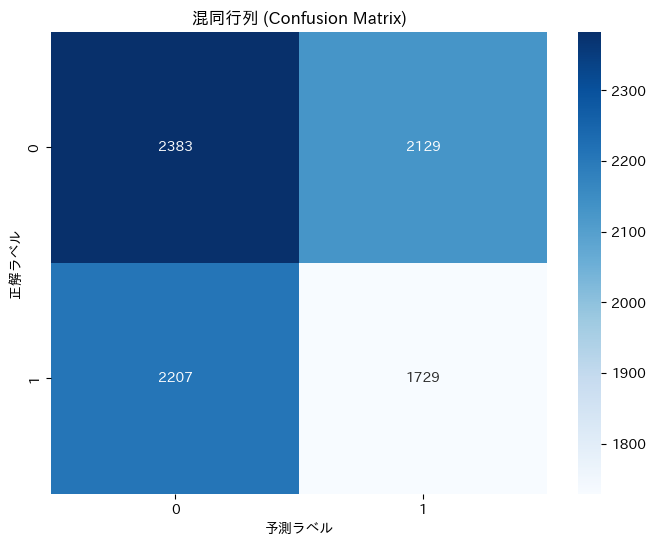


--- 分類レポート ---
              precision    recall  f1-score   support

           0       0.52      0.53      0.52      4512
           1       0.45      0.44      0.44      3936

    accuracy                           0.49      8448
   macro avg       0.48      0.48      0.48      8448
weighted avg       0.49      0.49      0.49      8448



In [30]:
import pandas as pd
import numpy as np
import glob
import os
import re
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

def process_csvs_into_dict(input_folder, new_column_name, values_list, column_to_filter='label', columns_to_drop=None):
    """
    (これまでのコードと同じ)
    指定フォルダ内の各CSVファイルを個別に処理し、その結果を辞書に格納して返します。
    """
    if not os.path.isdir(input_folder):
        print(f"エラー: 入力フォルダ '{input_folder}' が見つかりません。")
        return {}
    csv_pattern = os.path.join(input_folder, '*.csv')
    csv_files = glob.glob(csv_pattern)
    def extract_number(filename):
        match = re.search(r'\d+', os.path.basename(filename))
        return int(match.group()) if match else 0
    csv_files.sort(key=extract_number)
    if not csv_files:
        return {}
    if len(csv_files) != len(values_list):
        print(f"警告: ファイル数 ({len(csv_files)}) と値のリストの長さ ({len(values_list)}) が一致しません。")
    
    processed_dfs = {}
    for i, file_path in enumerate(csv_files):
        basename = os.path.basename(file_path)
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
            if i < len(values_list):
                df[new_column_name] = values_list[i]
            else:
                df[new_column_name] = None
            if column_to_filter and column_to_filter in df.columns:
                target_labels = [f'answer{i}' for i in range(1, 11)]
                df = df[df[column_to_filter].isin(target_labels)].copy()
            if columns_to_drop:
                existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]
                if existing_cols_to_drop:
                    df = df.drop(columns=existing_cols_to_drop)
            df.reset_index(drop=True, inplace=True)
            processed_dfs[basename] = df
        except Exception as e:
            print(f"エラー: '{basename}' の処理中に問題が発生: {e}")
            continue
    return processed_dfs

# --- 1. データ準備 ---
# --------------------------------------------------
input_folder_path = './voice_csv'
columns_to_remove = ['start', 'end', 'original_start', 'original_end'] 
values_for_files = [0, 0, 0, 0, 1, 0, 1, 1, 1, 1]
new_column_name_to_add = 'condition'

# これまでの処理で、ファイルごとのDataFrameを辞書に格納
all_data_dfs_dict = process_csvs_into_dict(
    input_folder_path,
    new_column_name=new_column_name_to_add,
    values_list=values_for_files,
    column_to_filter='label', 
    columns_to_drop=columns_to_remove
)

# LOPOのために、再度一つのDataFrameに結合し、人物ID列を追加
person_id_counter = 0
df_list_for_lopo = []
for filename, df in all_data_dfs_dict.items():
    # ファイルごとにユニークなIDを割り当てる
    df['person_id'] = person_id_counter
    df_list_for_lopo.append(df)
    person_id_counter += 1

if not df_list_for_lopo:
    print("処理するデータがありません。")
else:
    final_df = pd.concat(df_list_for_lopo, ignore_index=True)
    print("\n--- Leave-One-Person-Outのためのデータ準備完了 ---")
    print(f"合計行数: {len(final_df)}")
    print(f"人物IDの数: {final_df['person_id'].nunique()}")
    print(final_df.head())

    # --- 2. 機械学習の準備 ---
    # --------------------------------------------------
    # 特徴量 (X) と 目的変数 (y) を定義
    # 'label'と'condition','person_id'列以外を特徴量とする
    feature_columns = final_df.columns.drop(['label', 'condition', 'person_id'])
    X = final_df[feature_columns]
    y = final_df['condition'] # 今回はcondition列(0/1)を予測すると仮定
    groups = final_df['person_id'] # LOPOのためのグループ分け情報

    # LeaveOneGroupOut のインスタンスを作成
    logo = LeaveOneGroupOut()

    # k-NNモデルの準備 (k=5)
    knn = KNeighborsClassifier(n_neighbors=5)

    # 結果を格納するためのリスト
    scores = []
    all_true_labels = []
    all_pred_labels = []

    print("\n--- Leave-One-Person-Out 交差検証を開始 ---")
    # --- 3. LOPO交差検証の実行 ---
    # --------------------------------------------------
    # logo.split() は、(訓練データのインデックス, テストデータのインデックス) のペアを生成する
    for i, (train_index, test_index) in enumerate(logo.split(X, y, groups)):
        
        # --- 訓練データとテストデータに分割 ---
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # テスト対象の人物IDを取得
        test_person_id = groups.iloc[test_index].unique()[0]
        print(f"\n--- Fold {i+1}/{logo.get_n_splits(groups=groups)} ---")
        print(f"テスト対象: person_id = {test_person_id}")

        # --- データの標準化 (Standardization) ---
        # 重要: 訓練データのみでStandardScalerを学習(fit)させる
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        
        # 学習したスケーラーを使ってテストデータを変換する
        X_test_scaled = scaler.transform(X_test)
        
        # --- k-NNモデルの学習と予測 ---
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        
        # --- 評価 ---
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)
        print(f"正解率 (Accuracy): {accuracy:.4f}")
        
        # 全体の評価のために、正解ラベルと予測ラベルを保存
        all_true_labels.extend(y_test)
        all_pred_labels.extend(y_pred)

    # --- 4. 最終結果の表示 ---
    # --------------------------------------------------
    print("\n--- 交差検証 最終結果 ---")
    print(f"各Foldの正解率: {[f'{s:.4f}' for s in scores]}")
    print(f"平均正解率 (Mean Accuracy): {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

    # --- 混同行列 (Confusion Matrix) の可視化 ---
    print("\n--- 混同行列 ---")
    cm = confusion_matrix(all_true_labels, all_pred_labels)
    print(cm)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(all_true_labels), 
                yticklabels=np.unique(all_true_labels))
    plt.xlabel('予測ラベル')
    plt.ylabel('正解ラベル')
    plt.title('混同行列 (Confusion Matrix)')
    plt.show()

    # --- 分類レポート ---
    print("\n--- 分類レポート ---")
    print(classification_report(all_true_labels, all_pred_labels))


--- Leave-One-Person-Out 交差検証を開始 ---

--- Fold 1/10 ---
テスト対象: person_id = 0


C:\Users\akini\anaconda3\envs\audio_analysis_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


正解率 (Accuracy): 0.5729

--- Fold 2/10 ---
テスト対象: person_id = 1


C:\Users\akini\anaconda3\envs\audio_analysis_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


正解率 (Accuracy): 0.6042

--- Fold 3/10 ---
テスト対象: person_id = 2


C:\Users\akini\anaconda3\envs\audio_analysis_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


正解率 (Accuracy): 0.5135

--- Fold 4/10 ---
テスト対象: person_id = 3


C:\Users\akini\anaconda3\envs\audio_analysis_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


正解率 (Accuracy): 0.4177

--- Fold 5/10 ---
テスト対象: person_id = 4


C:\Users\akini\anaconda3\envs\audio_analysis_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


正解率 (Accuracy): 0.6441

--- Fold 6/10 ---
テスト対象: person_id = 5


C:\Users\akini\anaconda3\envs\audio_analysis_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


正解率 (Accuracy): 0.4167

--- Fold 7/10 ---
テスト対象: person_id = 6


C:\Users\akini\anaconda3\envs\audio_analysis_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


正解率 (Accuracy): 0.3500

--- Fold 8/10 ---
テスト対象: person_id = 7


C:\Users\akini\anaconda3\envs\audio_analysis_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


正解率 (Accuracy): 0.4120

--- Fold 9/10 ---
テスト対象: person_id = 8


C:\Users\akini\anaconda3\envs\audio_analysis_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


正解率 (Accuracy): 0.5058

--- Fold 10/10 ---
テスト対象: person_id = 9


C:\Users\akini\anaconda3\envs\audio_analysis_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


正解率 (Accuracy): 0.3557

--- 交差検証 最終結果 ---
各Foldの正解率: ['0.5729', '0.6042', '0.5135', '0.4177', '0.6441', '0.4167', '0.3500', '0.4120', '0.5058', '0.3557']
平均正解率 (Mean Accuracy): 0.4793 (+/- 0.0988)

--- 混同行列 ---


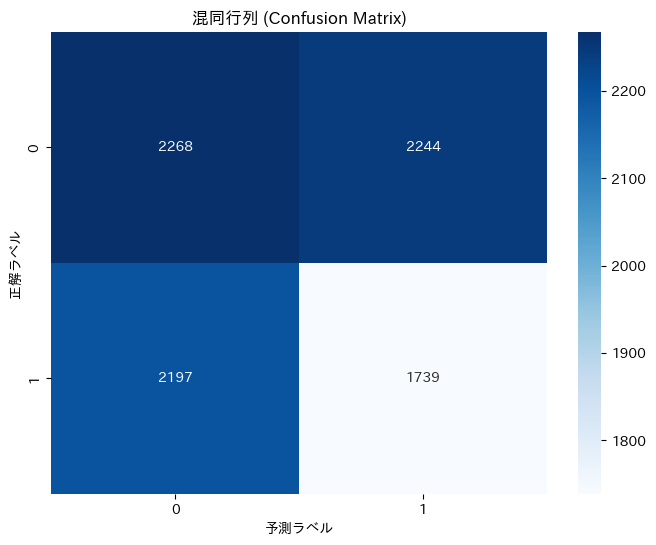


--- 分類レポート ---
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      4512
           1       0.44      0.44      0.44      3936

    accuracy                           0.47      8448
   macro avg       0.47      0.47      0.47      8448
weighted avg       0.47      0.47      0.47      8448



In [3]:
import pandas as pd
import numpy as np
import glob
import os
import re
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

# (process_csvs_into_dict 関数は変更なし)
def process_csvs_into_dict(input_folder, new_column_name, values_list, column_to_filter='label', columns_to_drop=None):
    if not os.path.isdir(input_folder): return {}
    csv_files = sorted(glob.glob(os.path.join(input_folder, '*.csv')), key=lambda f: int(re.search(r'\d+', os.path.basename(f)).group()) if re.search(r'\d+', os.path.basename(f)) else 0)
    if not csv_files or len(csv_files) != len(values_list): print("警告: ファイル数と値リストの長さが不一致です。")
    processed_dfs = {}
    for i, file_path in enumerate(csv_files):
        basename = os.path.basename(file_path)
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
            df[new_column_name] = values_list[i] if i < len(values_list) else None
            if column_to_filter and column_to_filter in df.columns:
                target_labels = [f'answer{j}' for j in range(1, 11)]
                df = df[df[column_to_filter].isin(target_labels)].copy()
            if columns_to_drop:
                df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')
            df.reset_index(drop=True, inplace=True)
            processed_dfs[basename] = df
        except Exception as e:
            print(f"エラー: '{basename}' の処理中に問題が発生: {e}")
    return processed_dfs


# --- 1. データ準備 ---
input_folder_path = './voice_csv'
columns_to_remove = ['start', 'end', 'original_start', 'original_end'] 
values_for_files = [0, 0, 0, 0, 1, 0, 1, 1, 1, 1]
new_column_name_to_add = 'condition'

all_data_dfs_dict = process_csvs_into_dict(
    input_folder_path,
    new_column_name=new_column_name_to_add,
    values_list=values_for_files,
    column_to_filter='label', 
    columns_to_drop=columns_to_remove
)

person_id_counter = 0
df_list_for_lopo = []
for filename, df in all_data_dfs_dict.items():
    df['person_id'] = person_id_counter
    df_list_for_lopo.append(df)
    person_id_counter += 1

if not df_list_for_lopo:
    print("処理するデータがありません。")
else:
    final_df = pd.concat(df_list_for_lopo, ignore_index=True)

    # --- 2. 機械学習の準備 ---
    feature_columns = final_df.columns.drop(['label', 'condition', 'person_id'])
    X = final_df[feature_columns]
    y = final_df['condition']
    groups = final_df['person_id'] 

    logo = LeaveOneGroupOut()
    knn = KNeighborsClassifier(n_neighbors=5)

    scores = []
    all_true_labels = []
    all_pred_labels = []

    print("\n--- Leave-One-Person-Out 交差検証を開始 ---")
    
    # --- 3. LOPO交差検証の実行 ---
    for i, (train_index, test_index) in enumerate(logo.split(X, y, groups)):
        
        # --- 訓練データとテストデータに分割 ---
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        groups_train, groups_test = groups.iloc[train_index], groups.iloc[test_index]
        
        test_person_id = groups_test.unique()[0]
        print(f"\n--- Fold {i+1}/{logo.get_n_splits(groups=groups)} ---")
        print(f"テスト対象: person_id = {test_person_id}")

        # ======================================================================
        # === ここからが変更箇所: ループ内でファイルごとに標準化 ===
        # ======================================================================
        
        # --- 訓練データを人物ごとに標準化 ---
        X_train_scaled_list = []
        for person_id in groups_train.unique():
            # 各人物のデータを抽出
            person_mask = (groups_train == person_id)
            X_train_person = X_train[person_mask]
            
            # その人物のデータのみでスケーラーを学習・変換
            scaler = StandardScaler()
            X_train_person_scaled = scaler.fit_transform(X_train_person)
            
            # スケール後のデータをDataFrameに戻し、リストに格納
            X_train_scaled_list.append(pd.DataFrame(X_train_person_scaled, index=X_train_person.index, columns=feature_columns))
        
        # 個別にスケールした全訓練データを結合
        X_train_scaled = pd.concat(X_train_scaled_list).sort_index()

        # --- テストデータを標準化 ---
        # テストデータ（1人分）のみでスケーラーを学習・変換
        test_scaler = StandardScaler()
        X_test_scaled = test_scaler.fit_transform(X_test)
        
        # ======================================================================

        # --- k-NNモデルの学習と予測 ---
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        
        # --- 評価 ---
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)
        print(f"正解率 (Accuracy): {accuracy:.4f}")
        
        all_true_labels.extend(y_test)
        all_pred_labels.extend(y_pred)

    # --- 4. 最終結果の表示 ---
    # (以降は変更なし)
    print("\n--- 交差検証 最終結果 ---")
    print(f"各Foldの正解率: {[f'{s:.4f}' for s in scores]}")
    print(f"平均正解率 (Mean Accuracy): {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")
    
    print("\n--- 混同行列 ---")
    cm = confusion_matrix(all_true_labels, all_pred_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(all_true_labels), 
                yticklabels=np.unique(all_true_labels))
    plt.xlabel('予測ラベル')
    plt.ylabel('正解ラベル')
    plt.title('混同行列 (Confusion Matrix)')
    plt.show()

    print("\n--- 分類レポート ---")
    print(classification_report(all_true_labels, all_pred_labels))


--- Leave-One-Person-Out 交差検証を開始 (モデル: ランダムフォレスト) ---

--- Fold 1/10 ---
テスト対象: person_id = 0
正解率 (Accuracy): 0.5771

--- Fold 2/10 ---
テスト対象: person_id = 1
正解率 (Accuracy): 0.6263

--- Fold 3/10 ---
テスト対象: person_id = 2
正解率 (Accuracy): 0.5177

--- Fold 4/10 ---
テスト対象: person_id = 3
正解率 (Accuracy): 0.4302

--- Fold 5/10 ---
テスト対象: person_id = 4
正解率 (Accuracy): 0.6597

--- Fold 6/10 ---
テスト対象: person_id = 5
正解率 (Accuracy): 0.4456

--- Fold 7/10 ---
テスト対象: person_id = 6
正解率 (Accuracy): 0.3000

--- Fold 8/10 ---
テスト対象: person_id = 7
正解率 (Accuracy): 0.3356

--- Fold 9/10 ---
テスト対象: person_id = 8
正解率 (Accuracy): 0.3889

--- Fold 10/10 ---
テスト対象: person_id = 9
正解率 (Accuracy): 0.2708

--- 交差検証 最終結果 ---
各Foldの正解率: ['0.5771', '0.6263', '0.5177', '0.4302', '0.6597', '0.4456', '0.3000', '0.3356', '0.3889', '0.2708']
平均正解率 (Mean Accuracy): 0.4552 (+/- 0.1294)

--- 混同行列 ---


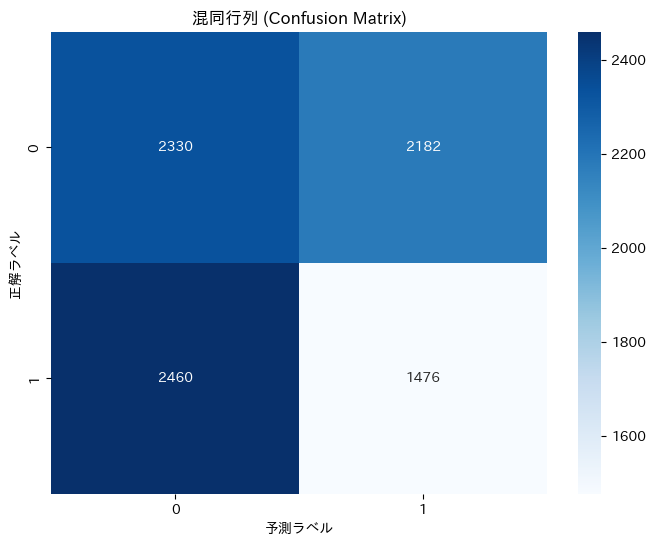


--- 分類レポート ---
              precision    recall  f1-score   support

           0       0.49      0.52      0.50      4512
           1       0.40      0.38      0.39      3936

    accuracy                           0.45      8448
   macro avg       0.44      0.45      0.44      8448
weighted avg       0.45      0.45      0.45      8448



In [6]:
import pandas as pd
import numpy as np
import glob
import os
import re
from sklearn.model_selection import LeaveOneGroupOut
# from sklearn.preprocessing import StandardScaler # 不要になったためコメントアウト
from sklearn.ensemble import RandomForestClassifier # ★ 変更
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

# (process_csvs_into_dict 関数は変更なし)
def process_csvs_into_dict(input_folder, new_column_name, values_list, column_to_filter='label', columns_to_drop=None):
    if not os.path.isdir(input_folder): return {}
    csv_files = sorted(glob.glob(os.path.join(input_folder, '*.csv')), key=lambda f: int(re.search(r'\d+', os.path.basename(f)).group()) if re.search(r'\d+', os.path.basename(f)) else 0)
    if not csv_files or len(csv_files) != len(values_list): print("警告: ファイル数と値リストの長さが不一致です。")
    processed_dfs = {}
    for i, file_path in enumerate(csv_files):
        basename = os.path.basename(file_path)
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
            df[new_column_name] = values_list[i] if i < len(values_list) else None
            if column_to_filter and column_to_filter in df.columns:
                target_labels = [f'answer{j}' for j in range(1, 11)]
                df = df[df[column_to_filter].isin(target_labels)].copy()
            if columns_to_drop:
                df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')
            df.reset_index(drop=True, inplace=True)
            processed_dfs[basename] = df
        except Exception as e:
            print(f"エラー: '{basename}' の処理中に問題が発生: {e}")
    return processed_dfs

# --- 1. データ準備 ---
input_folder_path = './voice_csv'
columns_to_remove = ['start', 'end', 'original_start', 'original_end'] 
values_for_files = [0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1]
new_column_name_to_add = 'condition'

all_data_dfs_dict = process_csvs_into_dict(
    input_folder_path,
    new_column_name=new_column_name_to_add,
    values_list=values_for_files,
    column_to_filter='label', 
    columns_to_drop=columns_to_remove
)

person_id_counter = 0
df_list_for_lopo = []
for filename, df in all_data_dfs_dict.items():
    df['person_id'] = person_id_counter
    df_list_for_lopo.append(df)
    person_id_counter += 1

if not df_list_for_lopo:
    print("処理するデータがありません。")
else:
    final_df = pd.concat(df_list_for_lopo, ignore_index=True)

    # --- 2. 機械学習の準備 ---
    feature_columns = final_df.columns.drop(['label', 'condition', 'person_id'])
    X = final_df[feature_columns]
    y = final_df['condition']
    groups = final_df['person_id'] 

    logo = LeaveOneGroupOut()
    # ★ 変更: RandomForestClassifierを準備
    # n_estimatorsは決定木の数。random_stateは結果を固定するために指定。
    # n_jobs=-1はCPUを最大限活用して計算を高速化する設定。
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    scores = []
    all_true_labels = []
    all_pred_labels = []

    print("\n--- Leave-One-Person-Out 交差検証を開始 (モデル: ランダムフォレスト) ---")
    
    # --- 3. LOPO交差検証の実行 ---
    for i, (train_index, test_index) in enumerate(logo.split(X, y, groups)):
        
        # --- 訓練データとテストデータに分割 ---
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        test_person_id = groups.iloc[test_index].unique()[0]
        print(f"\n--- Fold {i+1}/{logo.get_n_splits(groups=groups)} ---")
        print(f"テスト対象: person_id = {test_person_id}")

        # ★ 変更: 標準化の処理は不要になったため削除

        # --- ランダムフォレストモデルの学習と予測 ---
        # ★ 変更: スケールしていない、元のデータをそのまま使用
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        
        # --- 評価 ---
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)
        print(f"正解率 (Accuracy): {accuracy:.4f}")
        
        all_true_labels.extend(y_test)
        all_pred_labels.extend(y_pred)

    # --- 4. 最終結果の表示 ---
    # (以降は変更なし)
    print("\n--- 交差検証 最終結果 ---")
    print(f"各Foldの正解率: {[f'{s:.4f}' for s in scores]}")
    print(f"平均正解率 (Mean Accuracy): {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")
    
    print("\n--- 混同行列 ---")
    cm = confusion_matrix(all_true_labels, all_pred_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(all_true_labels), 
                yticklabels=np.unique(all_true_labels))
    plt.xlabel('予測ラベル')
    plt.ylabel('正解ラベル')
    plt.title('混同行列 (Confusion Matrix)')
    plt.show()

    print("\n--- 分類レポート ---")
    print(classification_report(all_true_labels, all_pred_labels))


--- Leave-One-Person-Out 交差検証を開始 (モデル: ランダムフォレスト) ---

--- Fold 1/65 ---
テスト対象: person_id = 0
正解率 (Accuracy): 0.5969

--- Fold 2/65 ---
テスト対象: person_id = 1
正解率 (Accuracy): 0.6438

--- Fold 3/65 ---
テスト対象: person_id = 2
正解率 (Accuracy): 0.0167

--- Fold 4/65 ---
テスト対象: person_id = 3
正解率 (Accuracy): 0.5760

--- Fold 5/65 ---
テスト対象: person_id = 4
正解率 (Accuracy): 0.0156

--- Fold 6/65 ---
テスト対象: person_id = 5
正解率 (Accuracy): 0.6528

--- Fold 7/65 ---
テスト対象: person_id = 6
正解率 (Accuracy): 0.6760

--- Fold 8/65 ---
テスト対象: person_id = 7
正解率 (Accuracy): 0.6263

--- Fold 9/65 ---
テスト対象: person_id = 8
正解率 (Accuracy): 0.5271

--- Fold 10/65 ---
テスト対象: person_id = 9
正解率 (Accuracy): 0.5167

--- Fold 11/65 ---
テスト対象: person_id = 10
正解率 (Accuracy): 0.5469

--- Fold 12/65 ---
テスト対象: person_id = 11
正解率 (Accuracy): 0.4406

--- Fold 13/65 ---
テスト対象: person_id = 12
正解率 (Accuracy): 0.4510

--- Fold 14/65 ---
テスト対象: person_id = 13
正解率 (Accuracy): 0.5396

--- Fold 15/65 ---
テスト対象: person_id = 14
正解率 (Accurac

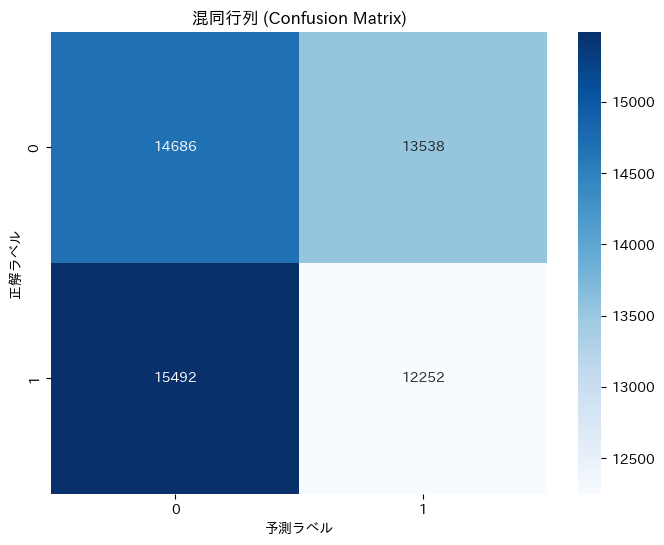


--- 分類レポート ---
              precision    recall  f1-score   support

           0       0.49      0.52      0.50     28224
           1       0.48      0.44      0.46     27744

    accuracy                           0.48     55968
   macro avg       0.48      0.48      0.48     55968
weighted avg       0.48      0.48      0.48     55968



In [9]:
import pandas as pd
import numpy as np
import glob
import os
import re
from sklearn.model_selection import LeaveOneGroupOut
# from sklearn.preprocessing import StandardScaler # 不要になったためコメントアウト
from sklearn.ensemble import RandomForestClassifier # ★ 変更
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib



# --- 1. データ準備 ---
input_folder_path = './voice_csv'
columns_to_remove = ['start', 'end', 'original_start', 'original_end'] 
values_for_files = [0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1]
new_column_name_to_add = 'condition'

all_data_dfs_dict = process_csvs_into_dict(
    input_folder_path,
    new_column_name=new_column_name_to_add,
    values_list=values_for_files,
    column_to_filter='label', 
    columns_to_drop=columns_to_remove
)

person_id_counter = 0
df_list_for_lopo = []
for filename, df in all_data_dfs_dict.items():
    df['person_id'] = person_id_counter
    df_list_for_lopo.append(df)
    person_id_counter += 1

if not df_list_for_lopo:
    print("処理するデータがありません。")
else:
    final_df = pd.concat(df_list_for_lopo, ignore_index=True)

    # --- 2. 機械学習の準備 ---
    feature_columns = final_df.columns.drop(['label', 'condition', 'person_id'])
    X = final_df[feature_columns]
    y = final_df['condition']
    groups = final_df['person_id'] 

    logo = LeaveOneGroupOut()
    # ★ 変更: RandomForestClassifierを準備
    # n_estimatorsは決定木の数。random_stateは結果を固定するために指定。
    # n_jobs=-1はCPUを最大限活用して計算を高速化する設定。
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    scores = []
    all_true_labels = []
    all_pred_labels = []

    print("\n--- Leave-One-Person-Out 交差検証を開始 (モデル: ランダムフォレスト) ---")
    
    # --- 3. LOPO交差検証の実行 ---
    for i, (train_index, test_index) in enumerate(logo.split(X, y, groups)):
        
        # --- 訓練データとテストデータに分割 ---
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        test_person_id = groups.iloc[test_index].unique()[0]
        print(f"\n--- Fold {i+1}/{logo.get_n_splits(groups=groups)} ---")
        print(f"テスト対象: person_id = {test_person_id}")

        # ★ 変更: 標準化の処理は不要になったため削除

        # --- ランダムフォレストモデルの学習と予測 ---
        # ★ 変更: スケールしていない、元のデータをそのまま使用
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        
        # --- 評価 ---
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)
        print(f"正解率 (Accuracy): {accuracy:.4f}")
        
        all_true_labels.extend(y_test)
        all_pred_labels.extend(y_pred)

    # --- 4. 最終結果の表示 ---
    # (以降は変更なし)
    print("\n--- 交差検証 最終結果 ---")
    print(f"各Foldの正解率: {[f'{s:.4f}' for s in scores]}")
    print(f"平均正解率 (Mean Accuracy): {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")
    
    print("\n--- 混同行列 ---")
    cm = confusion_matrix(all_true_labels, all_pred_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(all_true_labels), 
                yticklabels=np.unique(all_true_labels))
    plt.xlabel('予測ラベル')
    plt.ylabel('正解ラベル')
    plt.title('混同行列 (Confusion Matrix)')
    plt.show()

    print("\n--- 分類レポート ---")
    print(classification_report(all_true_labels, all_pred_labels))

    


--- Leave-One-Person-Out 交差検証を開始 ---

--- Fold 1/65 ---
テスト対象: person_id = 0
正解率 (Accuracy): 0.3510

--- Fold 2/65 ---
テスト対象: person_id = 1
正解率 (Accuracy): 0.4156

--- Fold 3/65 ---
テスト対象: person_id = 2
正解率 (Accuracy): 0.2969

--- Fold 4/65 ---
テスト対象: person_id = 3
正解率 (Accuracy): 0.5708

--- Fold 5/65 ---
テスト対象: person_id = 4
正解率 (Accuracy): 0.1667

--- Fold 6/65 ---
テスト対象: person_id = 5
正解率 (Accuracy): 0.4005

--- Fold 7/65 ---
テスト対象: person_id = 6
正解率 (Accuracy): 0.6229

--- Fold 8/65 ---
テスト対象: person_id = 7
正解率 (Accuracy): 0.5977

--- Fold 9/65 ---
テスト対象: person_id = 8
正解率 (Accuracy): 0.4958

--- Fold 10/65 ---
テスト対象: person_id = 9
正解率 (Accuracy): 0.4333

--- Fold 11/65 ---
テスト対象: person_id = 10
正解率 (Accuracy): 0.5104

--- Fold 12/65 ---
テスト対象: person_id = 11
正解率 (Accuracy): 0.4656

--- Fold 13/65 ---
テスト対象: person_id = 12
正解率 (Accuracy): 0.4708

--- Fold 14/65 ---
テスト対象: person_id = 13
正解率 (Accuracy): 0.6740

--- Fold 15/65 ---
テスト対象: person_id = 14
正解率 (Accuracy): 0.5637

--- F

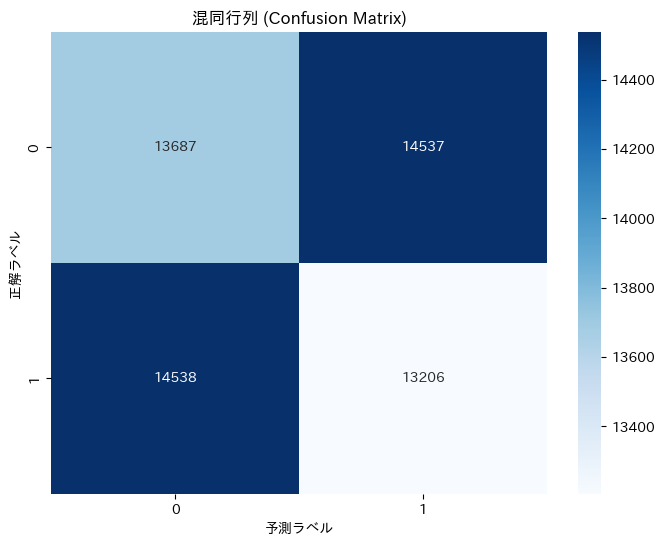


--- 分類レポート ---
              precision    recall  f1-score   support

           0       0.48      0.48      0.48     28224
           1       0.48      0.48      0.48     27744

    accuracy                           0.48     55968
   macro avg       0.48      0.48      0.48     55968
weighted avg       0.48      0.48      0.48     55968



In [8]:
import pandas as pd
import numpy as np
import glob
import os
import re
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

# (process_csvs_into_dict 関数は変更なし)
def process_csvs_into_dict(input_folder, new_column_name, values_list, column_to_filter='label', columns_to_drop=None):
    if not os.path.isdir(input_folder): return {}
    csv_files = sorted(glob.glob(os.path.join(input_folder, '*.csv')), key=lambda f: int(re.search(r'\d+', os.path.basename(f)).group()) if re.search(r'\d+', os.path.basename(f)) else 0)
    if not csv_files or len(csv_files) != len(values_list): print("警告: ファイル数と値リストの長さが不一致です。")
    processed_dfs = {}
    for i, file_path in enumerate(csv_files):
        basename = os.path.basename(file_path)
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
            df[new_column_name] = values_list[i] if i < len(values_list) else None
            if column_to_filter and column_to_filter in df.columns:
                target_labels = [f'answer{j}' for j in range(1, 11)]
                
                # ▼▼▼ ここを修正 ▼▼▼
                # .astype(str)で列を文字列型に変換し、.str.strip()で前後の空白を削除してからフィルタリング
                df = df[df[column_to_filter].astype(str).str.strip().isin(target_labels)].copy()
                # ▲▲▲▲▲▲▲▲▲▲▲▲

            if columns_to_drop:
                df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')
            df.reset_index(drop=True, inplace=True)
            processed_dfs[basename] = df
        except Exception as e:
            print(f"エラー: '{basename}' の処理中に問題が発生: {e}")
    return processed_dfs


# --- 1. データ準備 ---
input_folder_path = './voice_csv'
columns_to_remove = ['start', 'end', 'original_start', 'original_end'] 
values_for_files = [0,0,1,0,1,0,
                    0,0,0,0,0,0,
                    0,1,1,0,1,0,
                    1,0,0,0,0,0,
                    1,0,1,1,0,0,
                    0,0,0,1,0,1,
                    0,0,0,1,1,1,
                    1,0,1,1,1,0,
                    1,1,1,1,1,1,
                    1,1,1,1,0,0,
                    1,1,1,1,1]
new_column_name_to_add = 'condition'

all_data_dfs_dict = process_csvs_into_dict(
    input_folder_path,
    new_column_name=new_column_name_to_add,
    values_list=values_for_files,
    column_to_filter='label', 
    columns_to_drop=columns_to_remove
)

person_id_counter = 0
df_list_for_lopo = []
for filename, df in all_data_dfs_dict.items():
    df['person_id'] = person_id_counter
    df_list_for_lopo.append(df)
    person_id_counter += 1

if not df_list_for_lopo:
    print("処理するデータがありません。")
else:
    final_df = pd.concat(df_list_for_lopo, ignore_index=True)

    # --- 2. 機械学習の準備 ---
    feature_columns = final_df.columns.drop(['label', 'condition', 'person_id'])
    X = final_df[feature_columns]
    y = final_df['condition']
    groups = final_df['person_id'] 

    logo = LeaveOneGroupOut()
    knn = KNeighborsClassifier(n_neighbors=5)

    scores = []
    all_true_labels = []
    all_pred_labels = []

    print("\n--- Leave-One-Person-Out 交差検証を開始 ---")
    
    # --- 3. LOPO交差検証の実行 ---
    for i, (train_index, test_index) in enumerate(logo.split(X, y, groups)):
        
        # --- 訓練データとテストデータに分割 ---
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        groups_train, groups_test = groups.iloc[train_index], groups.iloc[test_index]
        
        test_person_id = groups_test.unique()[0]
        print(f"\n--- Fold {i+1}/{logo.get_n_splits(groups=groups)} ---")
        print(f"テスト対象: person_id = {test_person_id}")

        # ======================================================================
        # === ここからが変更箇所: ループ内でファイルごとに標準化 ===
        # ======================================================================
        
        # --- 訓練データを人物ごとに標準化 ---
        X_train_scaled_list = []
        for person_id in groups_train.unique():
            # 各人物のデータを抽出
            person_mask = (groups_train == person_id)
            X_train_person = X_train[person_mask]
            
            # その人物のデータのみでスケーラーを学習・変換
            scaler = StandardScaler()
            X_train_person_scaled = scaler.fit_transform(X_train_person)
            
            # スケール後のデータをDataFrameに戻し、リストに格納
            X_train_scaled_list.append(pd.DataFrame(X_train_person_scaled, index=X_train_person.index, columns=feature_columns))
        
        # 個別にスケールした全訓練データを結合
        X_train_scaled = pd.concat(X_train_scaled_list).sort_index()

        # --- テストデータを標準化 ---
        # テストデータ（1人分）のみでスケーラーを学習・変換
        test_scaler = StandardScaler()
        X_test_scaled_np = test_scaler.fit_transform(X_test)
        X_test_scaled = pd.DataFrame(X_test_scaled_np, index=X_test.index, columns=feature_columns)
        
        # ======================================================================

        # --- k-NNモデルの学習と予測 ---
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        
        # --- 評価 ---
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)
        print(f"正解率 (Accuracy): {accuracy:.4f}")
        
        all_true_labels.extend(y_test)
        all_pred_labels.extend(y_pred)

    # --- 4. 最終結果の表示 ---
    # (以降は変更なし)
    print("\n--- 交差検証 最終結果 ---")
    print(f"各Foldの正解率: {[f'{s:.4f}' for s in scores]}")
    print(f"平均正解率 (Mean Accuracy): {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")
    
    print("\n--- 混同行列 ---")
    cm = confusion_matrix(all_true_labels, all_pred_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(all_true_labels), 
                yticklabels=np.unique(all_true_labels))
    plt.xlabel('予測ラベル')
    plt.ylabel('正解ラベル')
    plt.title('混同行列 (Confusion Matrix)')
    plt.show()

    print("\n--- 分類レポート ---")
    print(classification_report(all_true_labels, all_pred_labels))


--- Leave-One-Person-Out 交差検証を開始 ---

--- Fold 1/65 ---
テスト対象: person_id = 0
  正解ラベル: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 

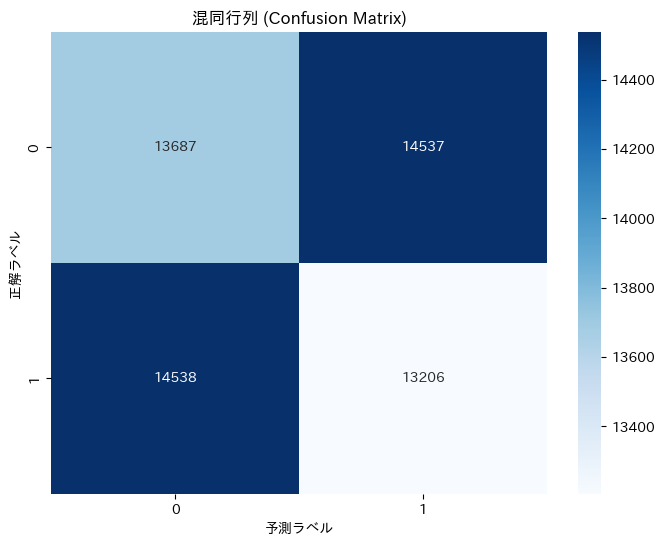


--- 分類レポート ---
              precision    recall  f1-score   support

           0       0.48      0.48      0.48     28224
           1       0.48      0.48      0.48     27744

    accuracy                           0.48     55968
   macro avg       0.48      0.48      0.48     55968
weighted avg       0.48      0.48      0.48     55968



In [10]:
import pandas as pd
import numpy as np
import glob
import os
import re
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

# (process_csvs_into_dict 関数は変更なし)
def process_csvs_into_dict(input_folder, new_column_name, values_list, column_to_filter='label', columns_to_drop=None):
    if not os.path.isdir(input_folder): return {}
    csv_files = sorted(glob.glob(os.path.join(input_folder, '*.csv')), key=lambda f: int(re.search(r'\d+', os.path.basename(f)).group()) if re.search(r'\d+', os.path.basename(f)) else 0)
    if not csv_files or len(csv_files) != len(values_list): print("警告: ファイル数と値リストの長さが不一致です。")
    processed_dfs = {}
    for i, file_path in enumerate(csv_files):
        basename = os.path.basename(file_path)
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
            df[new_column_name] = values_list[i] if i < len(values_list) else None
            if column_to_filter and column_to_filter in df.columns:
                target_labels = [f'answer{j}' for j in range(1, 11)]
                df = df[df[column_to_filter].astype(str).str.strip().isin(target_labels)].copy()
            if columns_to_drop:
                df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')
            df.reset_index(drop=True, inplace=True)
            processed_dfs[basename] = df
        except Exception as e:
            print(f"エラー: '{basename}' の処理中に問題が発生: {e}")
    return processed_dfs


# --- 1. データ準備 ---
input_folder_path = './voice_csv'
columns_to_remove = ['start', 'end', 'original_start', 'original_end'] 
values_for_files = [0,0,1,0,1,0,
                    0,0,0,0,0,0,
                    0,1,1,0,1,0,
                    1,0,0,0,0,0,
                    1,0,1,1,0,0,
                    0,0,0,1,0,1,
                    0,0,0,1,1,1,
                    1,0,1,1,1,0,
                    1,1,1,1,1,1,
                    1,1,1,1,0,0,
                    1,1,1,1,1]
new_column_name_to_add = 'condition'

all_data_dfs_dict = process_csvs_into_dict(
    input_folder_path,
    new_column_name=new_column_name_to_add,
    values_list=values_for_files,
    column_to_filter='label', 
    columns_to_drop=columns_to_remove
)

person_id_counter = 0
df_list_for_lopo = []
for filename, df in all_data_dfs_dict.items():
    df['person_id'] = person_id_counter
    df_list_for_lopo.append(df)
    person_id_counter += 1

if not df_list_for_lopo:
    print("処理するデータがありません。")
else:
    final_df = pd.concat(df_list_for_lopo, ignore_index=True)

    # --- 2. 機械学習の準備 ---
    feature_columns = final_df.columns.drop(['label', 'condition', 'person_id'])
    X = final_df[feature_columns]
    y = final_df['condition']
    groups = final_df['person_id'] 

    logo = LeaveOneGroupOut()
    knn = KNeighborsClassifier(n_neighbors=5)

    scores = []
    all_true_labels = []
    all_pred_labels = []

    print("\n--- Leave-One-Person-Out 交差検証を開始 ---")
    
    # --- 3. LOPO交差検証の実行 ---
    for i, (train_index, test_index) in enumerate(logo.split(X, y, groups)):
        
        # --- 訓練データとテストデータに分割 ---
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        groups_train, groups_test = groups.iloc[train_index], groups.iloc[test_index]
        
        test_person_id = groups_test.unique()[0]
        print(f"\n--- Fold {i+1}/{logo.get_n_splits(groups=groups)} ---")
        print(f"テスト対象: person_id = {test_person_id}")

        # --- 標準化 ---
        X_train_scaled_list = []
        for person_id in groups_train.unique():
            person_mask = (groups_train == person_id)
            X_train_person = X_train[person_mask]
            scaler = StandardScaler()
            X_train_person_scaled = scaler.fit_transform(X_train_person)
            X_train_scaled_list.append(pd.DataFrame(X_train_person_scaled, index=X_train_person.index, columns=feature_columns))
        
        X_train_scaled = pd.concat(X_train_scaled_list).sort_index()

        test_scaler = StandardScaler()
        X_test_scaled_np = test_scaler.fit_transform(X_test)
        X_test_scaled = pd.DataFrame(X_test_scaled_np, index=X_test.index, columns=feature_columns)
        
        # --- k-NNモデルの学習 ---
        knn.fit(X_train_scaled, y_train)
        
        # ▼▼▼ ここからを変更 ▼▼▼
        # --- 確率を予測し、閾値0.5で分類 ---
        # クラス1に属する確率を予測
        y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]
        
        # 確率が0.5以上なら1、そうでなければ0に変換
        y_pred = (y_pred_proba >= 0.5).astype(int)
        
        # --- 正解ラベルと予測ラベルの表示 ---
        # y_test.valuesでpandas SeriesからNumpy配列に変換して表示
        print(f"  正解ラベル: {y_test.values}")
        print(f"  予測ラベル: {y_pred}")
        # ▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲

        # --- 評価 ---
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)
        print(f"  このFoldの正解率 (Accuracy): {accuracy:.4f}")
        
        all_true_labels.extend(y_test)
        all_pred_labels.extend(y_pred)

    # --- 4. 最終結果の表示 ---
    # (以降は変更なし)
    print("\n--- 交差検証 最終結果 ---")
    print(f"各Foldの正解率: {[f'{s:.4f}' for s in scores]}")
    print(f"平均正解率 (Mean Accuracy): {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")
    
    print("\n--- 混同行列 ---")
    cm = confusion_matrix(all_true_labels, all_pred_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(all_true_labels), 
                yticklabels=np.unique(all_true_labels))
    plt.xlabel('予測ラベル')
    plt.ylabel('正解ラベル')
    plt.title('混同行列 (Confusion Matrix)')
    plt.show()

    print("\n--- 分類レポート ---")
    print(classification_report(all_true_labels, all_pred_labels))

In [16]:
import pandas as pd
import numpy as np
import glob
import os
import re
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

# (process_csvs_into_dict 関数は変更なし)
def process_csvs_into_dict(input_folder, new_column_name, values_list, column_to_filter='label', columns_to_drop=None):
    if not os.path.isdir(input_folder): return {}
    csv_files = sorted(glob.glob(os.path.join(input_folder, '*.csv')), key=lambda f: int(re.search(r'\d+', os.path.basename(f)).group()) if re.search(r'\d+', os.path.basename(f)) else 0)
    if not csv_files or len(csv_files) != len(values_list): print("警告: ファイル数と値リストの長さが不一致です。")
    processed_dfs = {}
    for i, file_path in enumerate(csv_files):
        basename = os.path.basename(file_path)
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
            df[new_column_name] = values_list[i] if i < len(values_list) else None
            if column_to_filter and column_to_filter in df.columns:
                target_labels = [f'answer{j}' for j in range(1, 11)]
                df = df[df[column_to_filter].astype(str).str.strip().isin(target_labels)].copy()
            if columns_to_drop:
                df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')
            df.reset_index(drop=True, inplace=True)
            processed_dfs[basename] = df
        except Exception as e:
            print(f"エラー: '{basename}' の処理中に問題が発生: {e}")
    return processed_dfs


# --- 1. データ準備 ---
input_folder_path = './voice_csv'
columns_to_remove = ['start', 'end', 'original_start', 'original_end'] 
values_for_files = [0,0,1,0,1,0,
                    0,0,0,0,0,0,
                    0,1,1,0,1,0,
                    1,0,0,0,0,0,
                    1,0,1,1,0,0,
                    0,0,0,1,0,1,
                    0,0,0,1,1,1,
                    1,0,1,1,1,0,
                    1,1,1,1,1,1,
                    1,1,1,1,0,0,
                    1,1,1,1,1]
new_column_name_to_add = 'condition'

all_data_dfs_dict = process_csvs_into_dict(
    input_folder_path,
    new_column_name=new_column_name_to_add,
    values_list=values_for_files,
    column_to_filter='label', 
    columns_to_drop=columns_to_remove
)

person_id_counter = 0
df_list_for_lopo = []
for filename, df in all_data_dfs_dict.items():
    df['person_id'] = person_id_counter
    df_list_for_lopo.append(df)
    person_id_counter += 1

if not df_list_for_lopo:
    print("処理するデータがありません。")
else:
    final_df = pd.concat(df_list_for_lopo, ignore_index=True)

    # --- 2. 特定の人物をテストデータとして分析する関数を定義 ---
    def run_single_person_analysis(df, test_person_id):
        print(f"\n--- テスト対象: person_id = {test_person_id} の分析結果 ---")

        # --- 機械学習の準備 ---
        feature_columns = df.columns.drop(['label', 'condition', 'person_id'])
        
        # --- 訓練データとテストデータに分割 ---
        train_df = df[df['person_id'] != test_person_id]
        test_df = df[df['person_id'] == test_person_id]

        X_train, y_train = train_df[feature_columns], train_df['condition']
        X_test, y_test = test_df[feature_columns], test_df['condition']
        groups_train = train_df['person_id']

        # --- 標準化 ---
        X_train_scaled_list = []
        for person_id in groups_train.unique():
            person_mask = (groups_train == person_id)
            X_train_person = X_train[person_mask]
            scaler = StandardScaler()
            X_train_person_scaled = scaler.fit_transform(X_train_person)
            X_train_scaled_list.append(pd.DataFrame(X_train_person_scaled, index=X_train_person.index, columns=feature_columns))
        
        X_train_scaled = pd.concat(X_train_scaled_list).sort_index()

        test_scaler = StandardScaler()
        X_test_scaled_np = test_scaler.fit_transform(X_test)
        X_test_scaled = pd.DataFrame(X_test_scaled_np, index=X_test.index, columns=feature_columns)
        
        # --- k-NNモデルの学習と予測 ---
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        
        # ▼▼▼ ここからが出力部分の変更箇所 ▼▼▼
        # --- 評価と結果表示 ---
        accuracy = accuracy_score(y_test, y_pred)
        
        # 正解ラベル（その被験者のconditionなので、最初の値を取得すればOK）
        true_label_single = y_test.iloc[0]
        
        # 予測ラベル（全予測の中で最も多かった値を多数決で採用）
        predicted_label_single = pd.Series(y_pred).mode()[0]

        print(f"  正解ラベル: {true_label_single}")
        print(f"  予測ラベル: {predicted_label_single} (多数決)")
        print(f"  正解率 (Accuracy): {accuracy:.4f}")
        # ▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲

        return accuracy

    # --- 3. 全ての人物に対して一度ずつ分析を実行 ---
    all_scores = []
    unique_persons = sorted(final_df['person_id'].unique())
    for person_id in unique_persons:
        score = run_single_person_analysis(final_df, test_person_id=person_id)
        all_scores.append(score)

    # --- 4. 最終的な平均スコアを表示 ---
    print(f"\n{'='*50}")
    print("--- 全ての個別分析が完了しました ---")
    print(f"{'='*50}")
    print(f"各Foldの正解率: {[f'{s:.4f}' for s in all_scores]}")
    print(f"最終的な平均正解率 (Mean Accuracy): {np.mean(all_scores):.4f} (+/- {np.std(all_scores):.4f})")


--- テスト対象: person_id = 0 の分析結果 ---
  正解ラベル: 0
  予測ラベル: 1 (多数決)
  正解率 (Accuracy): 0.3510

--- テスト対象: person_id = 1 の分析結果 ---
  正解ラベル: 0
  予測ラベル: 1 (多数決)
  正解率 (Accuracy): 0.4156

--- テスト対象: person_id = 2 の分析結果 ---
  正解ラベル: 1
  予測ラベル: 0 (多数決)
  正解率 (Accuracy): 0.2969

--- テスト対象: person_id = 3 の分析結果 ---
  正解ラベル: 0
  予測ラベル: 0 (多数決)
  正解率 (Accuracy): 0.5708

--- テスト対象: person_id = 4 の分析結果 ---
  正解ラベル: 1
  予測ラベル: 0 (多数決)
  正解率 (Accuracy): 0.1667

--- テスト対象: person_id = 5 の分析結果 ---
  正解ラベル: 0
  予測ラベル: 1 (多数決)
  正解率 (Accuracy): 0.4005

--- テスト対象: person_id = 6 の分析結果 ---
  正解ラベル: 0
  予測ラベル: 0 (多数決)
  正解率 (Accuracy): 0.6229

--- テスト対象: person_id = 7 の分析結果 ---
  正解ラベル: 0
  予測ラベル: 0 (多数決)
  正解率 (Accuracy): 0.5977

--- テスト対象: person_id = 8 の分析結果 ---
  正解ラベル: 0
  予測ラベル: 1 (多数決)
  正解率 (Accuracy): 0.4958

--- テスト対象: person_id = 9 の分析結果 ---
  正解ラベル: 0
  予測ラベル: 1 (多数決)
  正解率 (Accuracy): 0.4333

--- テスト対象: person_id = 10 の分析結果 ---
  正解ラベル: 0
  予測ラベル: 0 (多数決)
  正解率 (Accuracy): 0.5104

--- テスト対象: person_i

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import re
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

# (process_csvs_into_dict 関数は変更なし)
def process_csvs_into_dict(input_folder, new_column_name, values_list, column_to_filter='label', columns_to_drop=None):
    if not os.path.isdir(input_folder): return {}
    csv_files = sorted(glob.glob(os.path.join(input_folder, '*.csv')), key=lambda f: int(re.search(r'\d+', os.path.basename(f)).group()) if re.search(r'\d+', os.path.basename(f)) else 0)
    if not csv_files or len(csv_files) != len(values_list): print("警告: ファイル数と値リストの長さが不一致です。")
    processed_dfs = {}
    for i, file_path in enumerate(csv_files):
        basename = os.path.basename(file_path)
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
            df[new_column_name] = values_list[i] if i < len(values_list) else None
            if column_to_filter and column_to_filter in df.columns:
                target_labels = [f'answer{j}' for j in range(1, 11)]
                df = df[df[column_to_filter].astype(str).str.strip().isin(target_labels)].copy()
            if columns_to_drop:
                df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')
            df.reset_index(drop=True, inplace=True)
            processed_dfs[basename] = df
        except Exception as e:
            print(f"エラー: '{basename}' の処理中に問題が発生: {e}")
    return processed_dfs


# --- 1. データ準備 ---
input_folder_path = './voice_csv'
columns_to_remove = ['start', 'end', 'original_start', 'original_end'] 
values_for_files = [0,0,1,0,1,0,
                    0,0,0,0,0,0,
                    0,1,1,0,1,0,
                    1,0,0,0,0,0,
                    1,0,1,1,0,0,
                    0,0,0,1,0,1,
                    0,0,0,1,1,1,
                    1,0,1,1,1,0,
                    1,1,1,1,1,1,
                    1,1,1,1,0,0,
                    1,1,1,1,1]
new_column_name_to_add = 'condition'

all_data_dfs_dict = process_csvs_into_dict(
    input_folder_path,
    new_column_name=new_column_name_to_add,
    values_list=values_for_files,
    column_to_filter='label', 
    columns_to_drop=columns_to_remove
)

person_id_counter = 0
df_list_for_lopo = []
for filename, df in all_data_dfs_dict.items():
    df['person_id'] = person_id_counter
    df_list_for_lopo.append(df)
    person_id_counter += 1

if not df_list_for_lopo:
    print("処理するデータがありません。")
else:
    final_df = pd.concat(df_list_for_lopo, ignore_index=True)

    # --- 2. 特定の人物をテストデータとして分析する関数を定義 ---
    def run_single_person_analysis(df, test_person_id):
        print(f"\n--- テスト対象: person_id = {test_person_id} の分析結果 ---")

        # --- 機械学習の準備 ---
        feature_columns = df.columns.drop(['label', 'condition', 'person_id'])
        
        # --- 訓練データとテストデータに分割 ---
        train_df = df[df['person_id'] != test_person_id]
        test_df = df[df['person_id'] == test_person_id]

        X_train, y_train = train_df[feature_columns], train_df['condition']
        X_test, y_test = test_df[feature_columns], test_df['condition']
        groups_train = train_df['person_id']

        # --- 標準化 ---
        X_train_scaled_list = []
        for person_id in groups_train.unique():
            person_mask = (groups_train == person_id)
            X_train_person = X_train[person_mask]
            scaler = StandardScaler()
            X_train_person_scaled = scaler.fit_transform(X_train_person)
            X_train_scaled_list.append(pd.DataFrame(X_train_person_scaled, index=X_train_person.index, columns=feature_columns))
        
        X_train_scaled = pd.concat(X_train_scaled_list).sort_index()

        test_scaler = StandardScaler()
        X_test_scaled_np = test_scaler.fit_transform(X_test)
        X_test_scaled = pd.DataFrame(X_test_scaled_np, index=X_test.index, columns=feature_columns)
        
        # --- k-NNモデルの学習と予測 ---
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        
        # ▼▼▼ ここからが出力部分の変更箇所 ▼▼▼
        # --- 評価と結果表示 ---
        accuracy = accuracy_score(y_test, y_pred)
        
        # 正解ラベル（その被験者のconditionなので、最初の値を取得すればOK）
        true_label_single = y_test.iloc[0]
        
        # 予測ラベル（全予測の中で最も多かった値を多数決で採用）
        predicted_label_single = pd.Series(y_pred).mode()[0]

        ### ▼ 変更箇所 ▼ ###
        # 予測ラベルの割合を計算
        label_counts = pd.Series(y_pred).value_counts()
        total_predictions = len(y_pred)
        proportions_list = []
        for label, count in label_counts.items():
            percentage = (count / total_predictions) * 100
            proportions_list.append(f"{label}が{count}個 ({percentage:.1f}%)")
        proportions_str = ", ".join(proportions_list)
        ### ▲ 変更箇所 ▲ ###

        print(f"  正解ラベル: {true_label_single}")
        print(f"  予測ラベル: {predicted_label_single} (多数決)")
        print(f"  予測の内訳: {proportions_str}") # ### ◀ 追加した行
        print(f"  正解率 (Accuracy): {accuracy:.4f}")
        # ▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲

        return accuracy

    # --- 3. 全ての人物に対して一度ずつ分析を実行 ---
    all_scores = []
    unique_persons = sorted(final_df['person_id'].unique())
    for person_id in unique_persons:
        score = run_single_person_analysis(final_df, test_person_id=person_id)
        all_scores.append(score)

    # --- 4. 最終的な平均スコアを表示 ---
    print(f"\n{'='*50}")
    print("--- 全ての個別分析が完了しました ---")
    print(f"{'='*50}")
    print(f"各Foldの正解率: {[f'{s:.4f}' for s in all_scores]}")
    print(f"最終的な平均正解率 (Mean Accuracy): {np.mean(all_scores):.4f} (+/- {np.std(all_scores):.4f})")


--- テスト対象: person_id = 0 の分析結果 ---
  正解ラベル: 0
  予測ラベル: 1 (多数決)
  予測の内訳: 1が623個 (64.9%), 0が337個 (35.1%)
  正解率 (Accuracy): 0.3510

--- テスト対象: person_id = 1 の分析結果 ---
  正解ラベル: 0
  予測ラベル: 1 (多数決)
  予測の内訳: 1が561個 (58.4%), 0が399個 (41.6%)
  正解率 (Accuracy): 0.4156

--- テスト対象: person_id = 2 の分析結果 ---
  正解ラベル: 1
  予測ラベル: 0 (多数決)
  予測の内訳: 0が675個 (70.3%), 1が285個 (29.7%)
  正解率 (Accuracy): 0.2969

--- テスト対象: person_id = 3 の分析結果 ---
  正解ラベル: 0
  予測ラベル: 0 (多数決)
  予測の内訳: 0が548個 (57.1%), 1が412個 (42.9%)
  正解率 (Accuracy): 0.5708

--- テスト対象: person_id = 4 の分析結果 ---
  正解ラベル: 1
  予測ラベル: 0 (多数決)
  予測の内訳: 0が640個 (83.3%), 1が128個 (16.7%)
  正解率 (Accuracy): 0.1667

--- テスト対象: person_id = 5 の分析結果 ---
  正解ラベル: 0
  予測ラベル: 1 (多数決)
  予測の内訳: 1が518個 (60.0%), 0が346個 (40.0%)
  正解率 (Accuracy): 0.4005

--- テスト対象: person_id = 6 の分析結果 ---
  正解ラベル: 0
  予測ラベル: 0 (多数決)
  予測の内訳: 0が598個 (62.3%), 1が362個 (37.7%)
  正解率 (Accuracy): 0.6229

--- テスト対象: person_id = 7 の分析結果 ---
  正解ラベル: 0
  予測ラベル: 0 (多数決)
  予測の内訳: 0が459個 (59.8%), 1が309個 (